<a href="https://colab.research.google.com/github/JGuarnizo/Coding_Dojo/blob/main/Machine_Learning/Week7_LogisticRegression/Regresi%C3%B3n_Logistica_Ejercicio_JG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#¿Regresión logística, bosque aleatorio o KNN?
### Por: José Guarnizo
### Fecha: 16/02/2022

Tarea
Utilizando el wine cultivars dataset de la sección de clasificación multiclase, tu tarea es utilizar modelos de regresión logística (uno frente a uno y uno frente a todos) y ajustarlos para su rendimiento óptimo. También debes intentar comparar el efecto de cuando intentas utilizar la regularización l1 y l2. Esta es una gran oportunidad para ver qué sucede cuando intentas ajustar un modelo. Después de hacer eso, intenta usar los modelos KNN, Bagged tree y Random Forest.

In [137]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [138]:
#Lectura de archivo directamente desde la página web
col_names=['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids',
 	'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None, names=col_names)

In [139]:
#Definición de matriz de características y target vector
X=df.drop(columns='Class')
y=df.Class.values

In [140]:
#División train_test_Split
X_train, X_test, y_train, y_test =train_test_split(X, y,random_state=0,stratify=y)
#Estandarización de variables X_train & X_test
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##Algoritmos

###Regresión Logística 
(One vs All, One vs One)

In [141]:
#Valor de ajuste C para los algoritmos de regresión lógistica
C_value=1
#One vs. All, Regularización L1
log_l1a = LogisticRegression(penalty='l1',C=C_value,solver='liblinear',multi_class='ovr')
log_l1a.fit(X_train, y_train)
sl1a_train = log_l1a.score(X_train, y_train)
sl1a_test = log_l1a.score(X_test, y_test)
#One vs. All, Regularización L2
log_l2a = LogisticRegression(C=C_value,multi_class='ovr')
log_l2a.fit(X_train, y_train)
sl2a_train = log_l2a.score(X_train, y_train)
sl2a_test = log_l2a.score(X_test, y_test)
#One vs. One, Regularización L1
log_l1b = OneVsOneClassifier(LogisticRegression(penalty='l1',C=C_value,solver='liblinear'))
log_l1b.fit(X_train, y_train)
sl1b_train = log_l1b.score(X_train, y_train)
sl1b_test = log_l1b.score(X_test, y_test)
#One vs. One, Regularización L2
log_l2b = OneVsOneClassifier(LogisticRegression(C=C_value))
log_l2b.fit(X_train, y_train)
sl2b_train = log_l2b.score(X_train, y_train)
sl2b_test = log_l2b.score(X_test, y_test)

###KNN

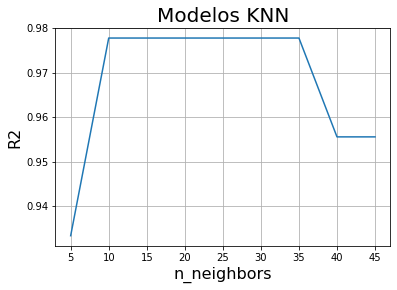

In [142]:
neighbors_range_knn = list(range(5, 50, 5))
scores_KNN = []
#Iteración para encontrar el n_neighbor óptimo
for neighbor in neighbors_range_knn:
  knn=KNeighborsClassifier(n_neighbors=neighbor)
  knn.fit(X_train, y_train)
  scores_KNN.append(knn.score(X_test, y_test))
#Gráfica de los distintos modelos KNN con n_neighbors variaando entre 5 a 50
plt.plot(neighbors_range_knn, scores_KNN)
plt.xlabel('n_neighbors', fontsize =16)
plt.ylabel('R2', fontsize = 16)
plt.title('Modelos KNN', fontsize = 20)
plt.grid()

In [143]:
#De la gráfica anterior, se concluye que n_neighbors para mejor R2 es 15
knn=KNeighborsClassifier(n_neighbors=15)
#Entrenamiento del modelo KNN
knn.fit(X_train,y_train)
#Algoritmo de clasificación R2 es precisión
knn_r2_train = knn.score(X_train,y_train)
knn_r2_test = knn.score(X_test,y_test)

###Bagging Trees

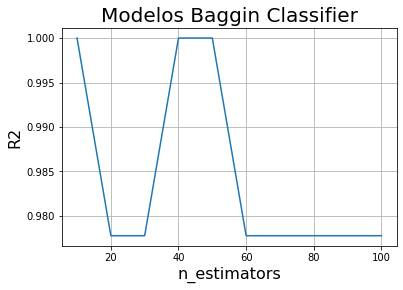

In [144]:
#Train/Test Split, porque para Baggin Trees o Random Forest no es necesario uso de Scaler
X_train, X_test, y_train, y_test =train_test_split(X, y,random_state=0,stratify=y)
#Búsqueda del n_estimator para lograr el mejor score
estimator_range_bt = list(range(10, 110, 10))
scores_bt = []
for estimator in estimator_range_bt:
    bt = BaggingClassifier(random_state=0, n_estimators=estimator)
    bt.fit(X_train, y_train)
    scores_bt.append(bt.score(X_test, y_test))
#Gráfica de los distintos random forests con n_estimators variaando entre 10-300
#Se observa mejor resultado con n_estimators=160
plt.plot(estimator_range_bt, scores_bt)
plt.xlabel('n_estimators', fontsize =16)
plt.ylabel('R2', fontsize = 16)
plt.title('Modelos Baggin Classifier', fontsize = 20)
plt.grid();

In [145]:
#De la gráfica anterior, se concluye que n_estimators para mejor R2 es 10
bt = BaggingClassifier(random_state=0, n_estimators=10)
#Entrenamiento del Bagging Classifier
bt.fit(X_train,y_train)
#Precisión del algoritmo
bt_r2_train = bt.score(X_train,y_train)
bt_r2_test = bt.score(X_test,y_test)


###Random Forest

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


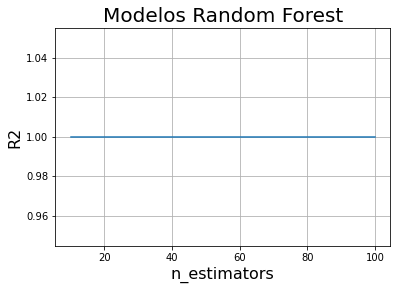

In [146]:
#Búsqueda del n_estimator para lograr el mejor score
estimator_range_forest = list(range(10, 110, 10))
scores_forest = []
for estimator in estimator_range_forest:
    forest = RandomForestClassifier(n_estimators=estimator, random_state=1, oob_score=True, n_jobs=2)
    forest.fit(X_train, y_train)
    scores_forest.append(forest.score(X_test, y_test))
#Gráfica de los distintos random forests con n_estimators variaando entre 10-300
#Se observa mejor resultado con n_estimators=160
plt.plot(estimator_range_forest, scores_forest)
plt.xlabel('n_estimators', fontsize =16)
plt.ylabel('R2', fontsize = 16)
plt.title('Modelos Random Forest', fontsize = 20)
plt.grid();

In [147]:
#De la gráfica anterior, se concluye que n_estimators para mejor R2 es 10
forest = RandomForestClassifier(n_estimators=10, random_state=1, oob_score=True, n_jobs=2)
#Entrenamiento del modelo Random Forest
forest.fit(X_train, y_train)
#Algoritmo de clasificación R2 es precisión
forest_r2_train = forest.score(X_train,y_train)
forest_r2_test = forest.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


##Resultados

In [148]:
#Comparación de resultados
print("Regresión_Log, Parámetro C = {}".format(C_value))
print("\t\t\tR2(Train)\tR2(Test)")
print("Log(One vs All)-L1 =\t{:.3f}\t\t{:.3f}".format(sl1a_train,sl1a_test))
print("Log(One vs All)-L2 =\t{:.3f}\t\t{:.3f}".format(sl2a_train,sl2a_test))
print("Log(One vs One)-L1 =\t{:.3f}\t\t{:.3f}".format(sl1b_train,sl1b_test))
print("Log(One vs One)-L2 =\t{:.3f}\t\t{:.3f}".format(sl2b_train,sl2b_test))
print("KNN (Neighbors=5)  =\t{:.3f}\t\t{:.3f}".format(knn_r2_train,knn_r2_test))
print("BagClass (est=10)  =\t{:.3f}\t\t{:.3f}".format(bt_r2_train,bt_r2_test))
print("RandomFor.(est=10) =\t{:.3f}\t\t{:.3f}".format(forest_r2_train,forest_r2_test))

Regresión_Log, Parámetro C = 1
			R2(Train)	R2(Test)
Log(One vs All)-L1 =	1.000		1.000
Log(One vs All)-L2 =	1.000		1.000
Log(One vs One)-L1 =	0.992		1.000
Log(One vs One)-L2 =	1.000		1.000
KNN (Neighbors=5)  =	0.962		0.978
BagClass (est=10)  =	1.000		1.000
RandomFor.(est=10) =	1.000		1.000


##Preguntas

**1. ¿Qué modelo funcionó mejor?**

Todos los modelos funcionan bien. Funciona mejor la regresión logística, se logra obtener resultados de precisión del 100% con un C>0.9, y no demanda tantos recursos como Random Forest. Adicional, en cualquier caso, la regresión logística obtiene un mejor resultado utilizando la penalización L2.

**2. ¿Cuáles son las características más importantes de tus modelos? ¿Hay algún modelo que te haya gustado más y por qué?**
Los parámetros de ajuste para obtener el mejor R2. En la regresión logística es el C, en KNN el N_neighbors, en Bagged Trees es el n_estimator, y en Random Forest tambien el n_estimator. Por otro lado, al ser una clasificación multiclase tambien influye la estratificación en la separación Train/Test.

Para estos problemas de clasificación me agradó más el modelo de Regresión Logística One vs All, porque esta incluido en la misma clase de Regresión Logística y con penalización L2. Arroja igual precisión que Random Forest pero no demanda tantos recursos computacionales.